In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import markers
import os
cm = 1/2.54
############### Un po' di formattazione ################
plt.rcParams["figure.figsize"] = (30*cm, 24*cm)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathpazo"
})


In [2]:
def load_data(filename):
    with open(filename) as f:
        raw = f.readlines()
    Pint = float(filename.split('_')[1].replace('.txt',''))
    rates = []
    Pcol = []
    for r in raw[4:]:
        rs = r.split()

        rates.append(float(rs[0]))
        Pcol.append(float(rs[1]))
    return Pint,rates,Pcol 

In [3]:
files = filter(lambda fn: 'pinterf' in fn, os.listdir('.'))
results = {}
for f in files:
    Pint,rates,Pcol = load_data(f)
    results[Pint] = (rates,Pcol)

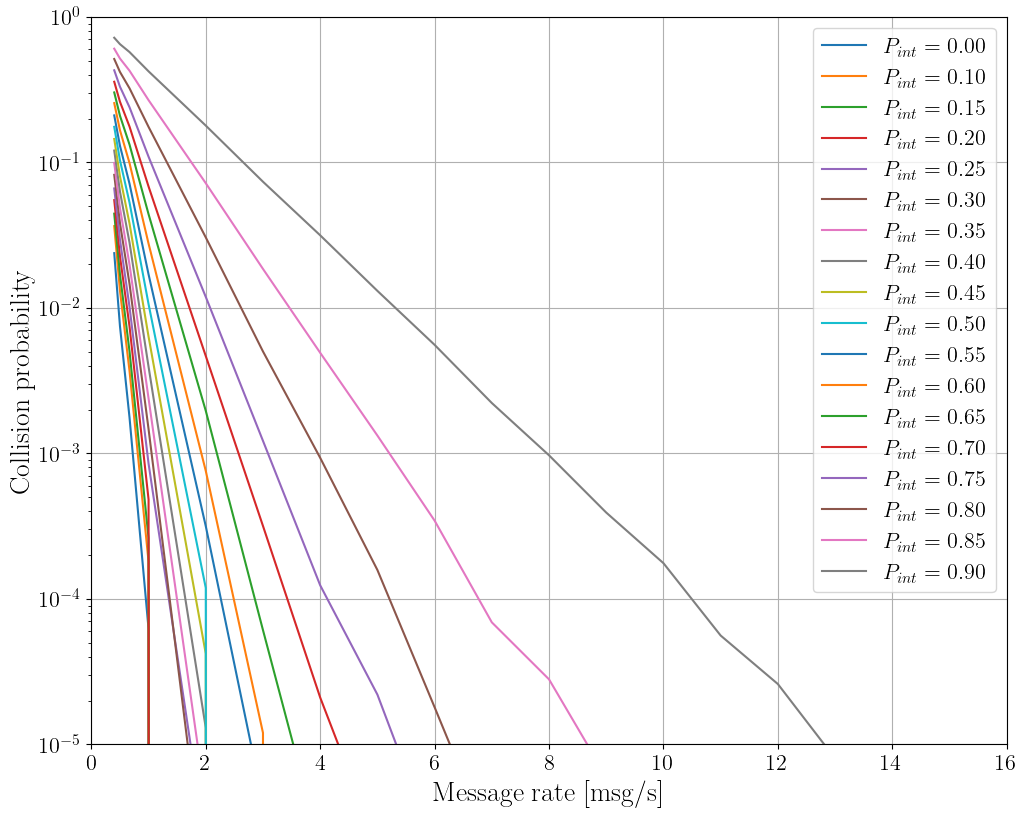

In [4]:
Pint = [0.0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
TICKS = [(3, 1),'o','d','p','v','>','X','*','P','D']

for r,pi in zip(sorted(results),Pint):
    plt.semilogy(results[r][0],results[r][1],label="$P_{int} = %.2f$"%r,markersize=12)

plt.ylim(ymax = 1.0,ymin=1e-5)
plt.xlim(xmin=0.0,xmax=16.0)
plt.xlabel("Message rate [msg/s]",fontweight='bold')
plt.ylabel("Collision probability",fontweight='bold')
plt.grid()
plt.legend()
plt.savefig('interf.pdf',bbox_inches='tight')
plt.show()


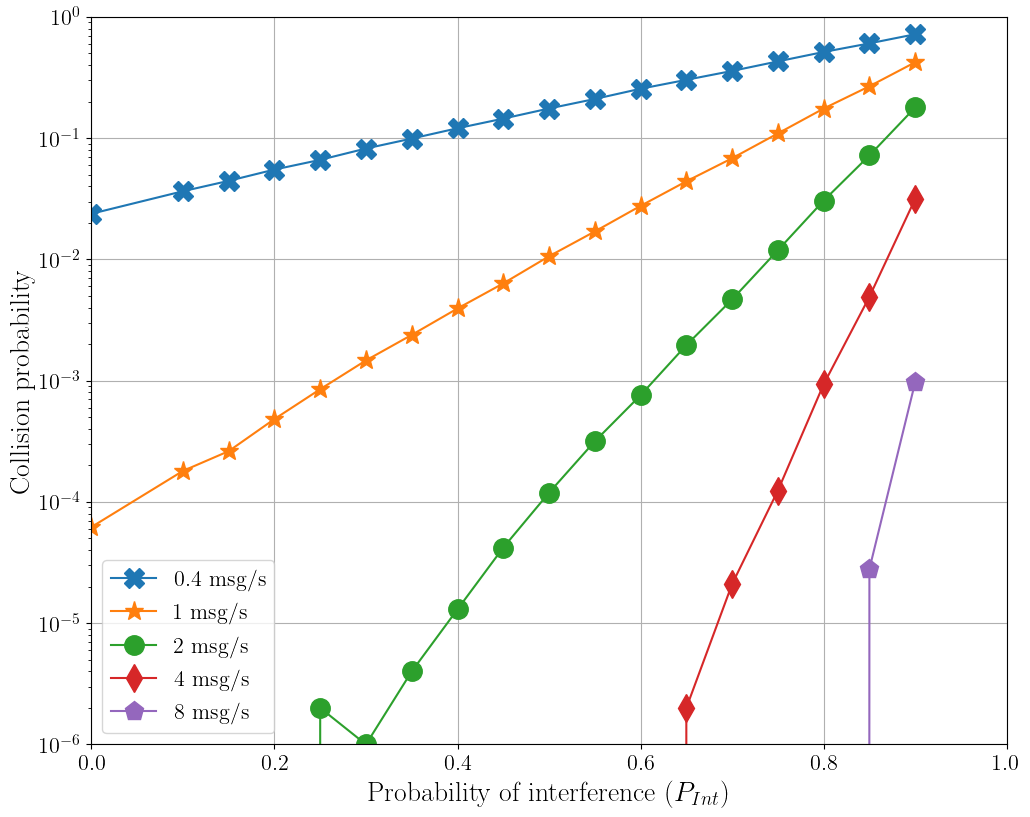

In [5]:
Pint = [0.0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
TICKS = [(3, 1),'o','d','p','v','>','X','*','P','D']

pcol = []
pcol2 = []
pcol01 = []
pcol4 = []
pcol8 = []

for p in Pint:
    
    pcol01.append(results[p][1][0])
    pcol.append(results[p][1][3])
    pcol2.append(results[p][1][4])
    pcol4.append(results[p][1][6])
    pcol8.append(results[p][1][10])

plt.semilogy(Pint,pcol01, '-X', label="0.4 msg/s", markersize = 14)
plt.semilogy(Pint,pcol, '-*', label="1 msg/s", markersize = 14)
plt.semilogy(Pint,pcol2, '-o', label="2 msg/s", markersize = 14)
plt.semilogy(Pint,pcol4, '-d', label="4 msg/s", markersize = 14)
plt.semilogy(Pint,pcol8, '-p', label="8 msg/s", markersize = 14)

# for r,pi,m in zip(results,Pint, TICKS):
#     plt.semilogy(r[0],r[1],marker=m,label="$P_{int} = %.1f$"%pi,markersize=12)

plt.ylim(ymax = 1.0,ymin=1e-6)
plt.xlim(xmin=0.0,xmax=1.0)
plt.xlabel("Probability of interference ($P_{Int}$)",fontweight='bold')
plt.ylabel("Collision probability",fontweight='bold')
plt.grid()
plt.legend()
plt.savefig('pcol_pint_1msg_s.pdf',bbox_inches='tight')
plt.show()

In [27]:
N = [n for n in range(1,21)]
Psucc = []
Ttx = 15
Trx = 60
for n in N:
    Ptx = n*Ttx/(n*Ttx+Trx)
    Prx = 1-Ptx
    Psucc_t = 1-(1-Ptx*Prx)**n
    Psucc.append(Psucc_t)


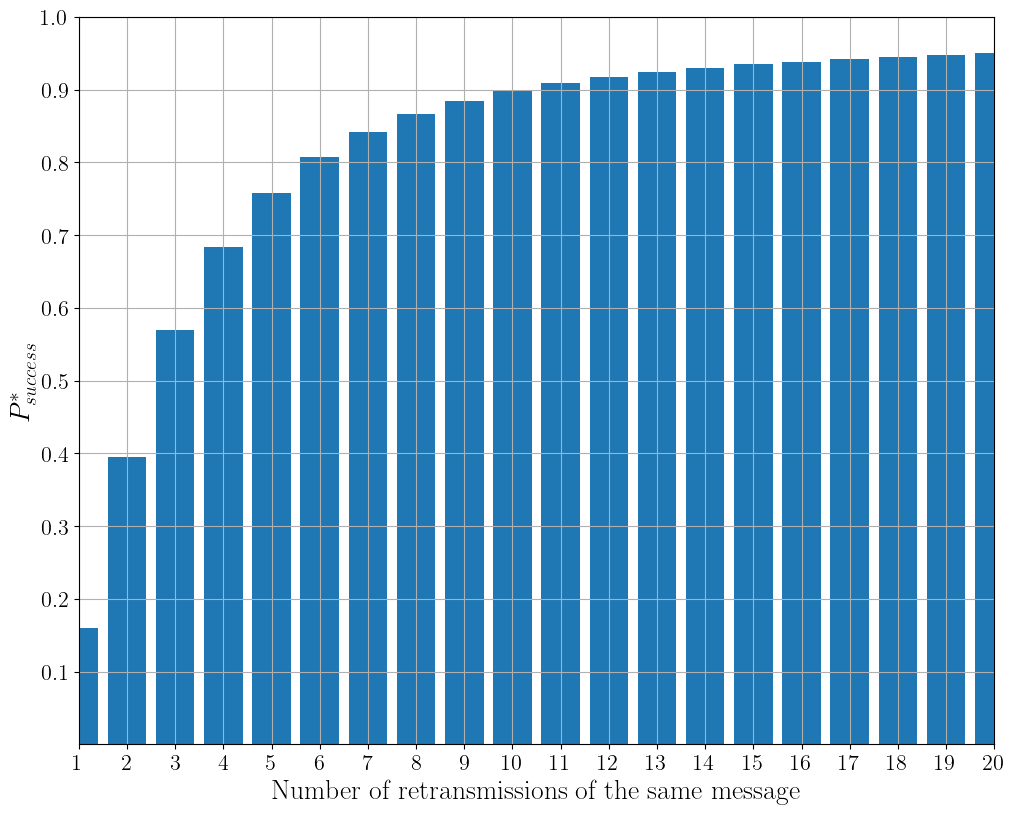

In [28]:
plt.bar(N,Psucc)
plt.xticks(N)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlim(xmin = 1, xmax = 20)
plt.ylim(ymin = 0, ymax = 1)
plt.xlabel("Number of retransmissions of the same message",fontweight='bold')
plt.ylabel("$P_{success}^*$" ,fontweight='bold')
plt.grid()
plt.savefig('p_succ_star.pdf',bbox_inches='tight')
plt.show()